In [1]:
from platform import python_version
print(python_version()) # tested with 3.7.1
# this adds the python wrapper module directory to the path.
import os
import sys
import numpy as np
import importlib
bindingspath = os.getcwd() + '/../build/python'
sys.path.append(bindingspath)
print(sys.path)

3.7.1
['/home/adria/Documents/Documents/TUM/dlfs/libdl/python', '/home/adria/anaconda3/lib/python37.zip', '/home/adria/anaconda3/lib/python3.7', '/home/adria/anaconda3/lib/python3.7/lib-dynload', '', '/home/adria/anaconda3/lib/python3.7/site-packages', '/home/adria/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/adria/.ipython', '/home/adria/Documents/Documents/TUM/dlfs/libdl/python/../build/python']


In [2]:
# The library wrapper
import pybindings as pyb

In [3]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from skimage import io
imTrain = io.imread(os.getcwd() + '/data/train-volume.tif')
NumImages = 30;
ImageDim = 512 * 512
imsTrain = np.reshape(imTrain, (NumImages, ImageDim)).transpose() 


lbTrain = io.imread(os.getcwd() + '/data/train-labels.tif')
lbsTrain = np.reshape(lbTrain, (NumImages, ImageDim)).transpose()
enc = OneHotEncoder(categories='auto')
enc.fit(lbsTrain.reshape(-1, 1))
lbsTrainOneHot = np.zeros((ImageDim,NumImages * 2))
for idx in range(0,NumImages):
    lbsTrainOneHot[:,2*idx:(2*idx +2)] = enc.transform(lbsTrain[:,idx].reshape(-1, 1)).toarray()
idx = 0
someIm0 = imsTrain[:,0];
someLb0 = lbsTrain[:,0];
someIm1 = imsTrain[:,1];
someLb1 = lbsTrain[:,1];

In [4]:
print("Values per Image:", imsTrain.shape[0])
print("Number of images for training:", imsTrain.shape[1])

print("Values per  Label Image:", lbsTrainOneHot.shape[0])
print("Number of images for Label training:", lbsTrainOneHot.shape[1])
plt.ion()
inputVar = 30 # change to visualize
while inputVar < 30:
    f = plt.figure(figsize=(20,5))
    f.suptitle('Original image and One Hot Labels', fontsize=16)
    plt.subplot(131)
    plt.imshow(np.reshape(imsTrain[:,inputVar],(512,512)), interpolation='nearest', cmap='gray')
    plt.subplot(132)
    plt.imshow(np.reshape(lbsTrainOneHot[:,2 * inputVar],(512,512)), interpolation='nearest', cmap='gray')
    plt.subplot(133)
    plt.imshow(np.reshape(lbsTrainOneHot[:,2 * inputVar + 1],(512,512)), interpolation='nearest', cmap='gray')
    plt.show()
    inputVar = int(input("Next Index? (Press 30 or larger escape)."))# wait for input from the user

Values per Image: 262144
Number of images for training: 30
Values per  Label Image: 262144
Number of images for Label training: 60


In [12]:
labelDepth = 2
segSimple = pyb.SegmentationExample3(512,512,1,labelDepth,
                                    3,3,3,3,3,3,3,3)

Conv In Depth: 1 In Height: 512 In Width: 512 Out Depth: 2 Out Height: 510 Out Width: 510
Conv In Depth: 2 In Height: 510 In Width: 510 Out Depth: 2 Out Height: 508 Out Width: 508
Conv In Depth: 2 In Height: 508 In Width: 508 Out Depth: 2 Out Height: 506 Out Width: 506
Conv In Depth: 2 In Height: 506 In Width: 506 Out Depth: 2 Out Height: 504 Out Width: 504
Conv In Depth: 2 In Height: 504 In Width: 504 Out Depth: 4 Out Height: 502 Out Width: 502
Conv In Depth: 4 In Height: 502 In Width: 502 Out Depth: 4 Out Height: 500 Out Width: 500
Conv In Depth: 4 In Height: 500 In Width: 500 Out Depth: 4 Out Height: 498 Out Width: 498
Conv In Depth: 4 In Height: 498 In Width: 498 Out Depth: 5 Out Height: 496 Out Width: 496
Tran In Depth: 5 In Height: 496 In Width: 496 Out Depth: 4 Out Height: 498 Out Width: 498
Tran In Depth: 4 In Height: 498 In Width: 498 Out Depth: 4 Out Height: 500 Out Width: 500
Tran In Depth: 4 In Height: 500 In Width: 500 Out Depth: 4 Out Height: 502 Out Width: 502
Tran In De

In [11]:
segSimple.Train(imsTrain[:,0],lbsTrainOneHot[:,0:2],0.0000001,1)
segSimpleOut = segSimple.Test(imsTrain[:,0])

0 vIndex
Loss of a given sample at epoch: 0
0.5
testing:
262144rows


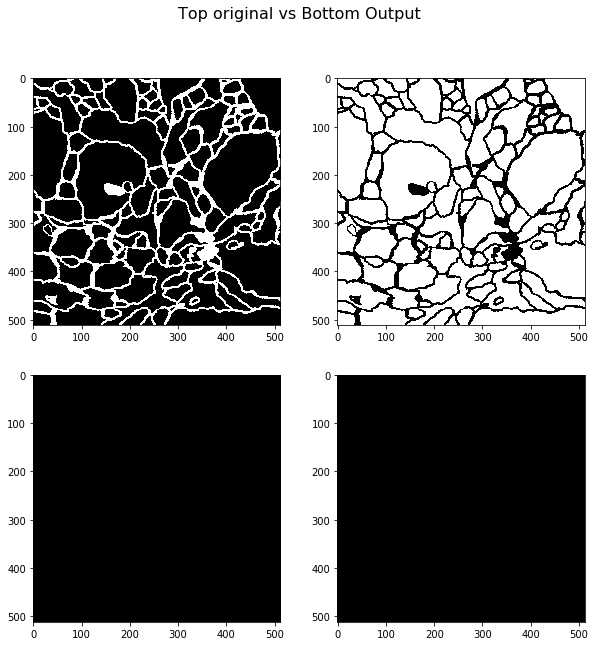

In [7]:
segSimpleOut2 = segSimpleOut.copy()
segSimpleOut2[segSimpleOut >= 0.5] = 1.0
segSimpleOut2[segSimpleOut < 0.5] = 0.0

f = plt.figure(figsize=(10,10))
f.suptitle('Top original vs Bottom Output', fontsize=16)
plt.subplot(221)
plt.imshow(np.reshape(lbsTrainOneHot[:,0],(512,512)), interpolation='nearest', cmap='gray')
plt.subplot(222)
plt.imshow(np.reshape(lbsTrainOneHot[:,1],(512,512)), interpolation='nearest', cmap='gray')
plt.subplot(223)
plt.imshow(np.reshape(segSimpleOut[:,0],(512,512)), interpolation='nearest', cmap='gray')
plt.subplot(224)
plt.imshow(np.reshape(segSimpleOut[:,1],(512,512)), interpolation='nearest', cmap='gray')
plt.show()

In [13]:
segSimpleOut

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [0.00213324, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])